<a href="https://colab.research.google.com/github/dani118089/assingment/blob/main/exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#importing the exel xlsx file
file="partpdf_1758712161434_netflix_titles.xlsx"
df_titles = pd.read_excel(file, sheet_name='netflix_titles')

df_netflix_titles_directors=pd.read_excel(file, sheet_name='netflix_titles_directors')
df_netflix_titles_countries=pd.read_excel(file, sheet_name='netflix_titles_countries')

df_netflix_titles_cast=pd.read_excel(file, sheet_name='netflix_titles_cast')

df_netflix_titles_category=pd.read_excel(file, sheet_name='netflix_titles_category')


# Merge all into a single DataFrame using 'show_id' as the key
master_df = df_titles \
    .merge(df_netflix_titles_directors, on='show_id', how='left') \
    .merge(df_netflix_titles_countries, on='show_id', how='left') \
    .merge(df_netflix_titles_cast, on='show_id', how='left') \
    .merge(df_netflix_titles_category, on='show_id', how='left')

# Display info of the merged DataFrame
master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139946 entries, 0 to 139945
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  98561 non-null   object 
 1   duration_seasons  41387 non-null   object 
 2   type              139945 non-null  object 
 3   title             139945 non-null  object 
 4   date_added        139785 non-null  object 
 5   release_year      139944 non-null  float64
 6   rating            139870 non-null  object 
 7   description       139943 non-null  object 
 8   show_id           139942 non-null  float64
 9   director          101031 non-null  object 
 10  country           134152 non-null  object 
 11  cast              138456 non-null  object 
 12  listed_in         139942 non-null  object 
dtypes: float64(2), object(11)
memory usage: 13.9+ MB


In [88]:
master_df.shape

(139946, 13)

**Which type of join did I use

I used a **left join** whn merging the main `netflix_titles` DataFrame with each of the other sheets. This ensures that all titles from the main sheet are retained, even if some do not have corresponding entries in the other sheets (e.g., missing cast or ratings info). Using a left join is appropriate because our primary goal is to analyze all Netflix titles, and we do not want to exclude any title just because some metadata is missing in the supporting tables

In [89]:
duplicates = master_df.duplicated()
print(master_df[duplicates])

      duration_minutes duration_seasons   type                title  \
16531               93              NaN  Movie  300 Miles to Heaven   
16532               93              NaN  Movie  300 Miles to Heaven   
16551               93              NaN  Movie  300 Miles to Heaven   
16552               93              NaN  Movie  300 Miles to Heaven   
16571               93              NaN  Movie  300 Miles to Heaven   
16572               93              NaN  Movie  300 Miles to Heaven   
56269              113              NaN  Movie      Blood Will Tell   
56270              113              NaN  Movie      Blood Will Tell   
56271              113              NaN  Movie      Blood Will Tell   
56272              113              NaN  Movie      Blood Will Tell   
56273              113              NaN  Movie      Blood Will Tell   
56274              113              NaN  Movie      Blood Will Tell   
56275              113              NaN  Movie      Blood Will Tell   
56276 

In [90]:
master_df = master_df.drop_duplicates()

In [91]:
master_df.shape

(139892, 13)

In [92]:
master_df.isnull().sum()

,0
duration_minutes,41385
duration_seasons,98505
type,1
title,1
date_added,161
release_year,2
rating,76
description,3
show_id,4
director,38915


In [93]:
# # Handle missing values:
# master_df['date_added'] = pd.to_datetime(master_df['date_added'], errors='coerce')
# master_df['director'] = master_df['director'].fillna('Unknown')
# master_df['country'] = master_df['country'].fillna('Unknown')

# # Extract year_added for trend analysis:
# master_df['year_added'] = master_df['date_added'].dt.year

# # Optional: Check the results
# print(master_df[['date_added', 'director', 'country', 'year_added']].head())

# Fill missing values
master_df['director'] = master_df['director'].fillna('Unknown')
master_df['country'] = master_df['country'].fillna('Unknown')
master_df['cast'] = master_df['cast'].fillna('Unknown')
master_df['date_added'] = pd.to_datetime(master_df['date_added'], errors='coerce')
master_df['rating'] = master_df['rating'].fillna('Unknown')
master_df['description'] = master_df['description'].fillna('No Description')
master_df['type'] = master_df['type'].fillna('Unknown')
master_df['title'] = master_df['title'].fillna('Unknown Title')
master_df['release_year'] = master_df['release_year'].fillna(0)
master_df['listed_in'] = master_df['listed_in'].fillna('Unknown')

In [94]:
# It's best to drop rows with missing show_id, as it's a unique identifier
master_df = master_df.dropna(subset=['show_id'])

In [95]:
# For duration columns: fill with 0 or leave as NaN depending on analysis needs
master_df['duration_minutes'] = master_df['duration_minutes'].fillna(0)
master_df['duration_seasons'] = master_df['duration_seasons'].fillna(0)

/tmp/ipython-input-446762149.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  master_df['duration_minutes'] = master_df['duration_minutes'].fillna(0)
/tmp/ipython-input-446762149.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  master_df['duration_seasons'] = master_df['duration_seasons'].fillna(0)


In [96]:
# Create year_added column for analysis
master_df['year_added'] = master_df['date_added'].dt.year

print(master_df[['country', 'date_added', 'year_added']].head())

         country date_added  year_added
0  United States 2019-09-09      2019.0
1  United States 2019-09-09      2019.0
2  United States 2019-09-09      2019.0
3  United States 2019-09-09      2019.0
4  United States 2019-09-09      2019.0


In [97]:
master_df.isnull().sum()

,0
duration_minutes,0
duration_seasons,0
type,0
title,0
date_added,159
release_year,0
rating,0
description,0
show_id,0
director,0


**Strategy for Handling Missing Data**

For missing values in the `country` column, I filled them with the `'Unknown'`. This approach preserves all records, ensuring that potentially valuable information in other columns is not lost. Dropping rows for missing country data might unnecessarily reduce the size of the dataset, while using `'Unknown'` allows for easy filtering or exclusion in subsequent analysis if desired and release year i filled with 0

In [98]:
# Split the cast column by comma, then explode
master_df['cast'] = master_df['cast'].fillna('Unknown')  # Fill missing values to avoid errors
master_df['cast'] = master_df['cast'].str.split(', ')
exploded_df = master_df.explode('cast')
# extra whitespace
exploded_df['cast'] = exploded_df['cast'].str.strip()

# Display the first few rows
print(exploded_df[['title', 'cast']].head())

                                     title              cast
0  Norm of the North: King Sized Adventure     Alan Marriott
1  Norm of the North: King Sized Adventure     Alan Marriott
2  Norm of the North: King Sized Adventure  Jennifer Cameron
3  Norm of the North: King Sized Adventure  Jennifer Cameron
4  Norm of the North: King Sized Adventure        Lee Tockar


**Business Advantage of Exploding the 'cast' Column**

By exploding the `cast` column so that each actor has their own row:

- Identify the most frequently appearing actors across all shows.
- Analyze collaboration networks (which actors appear together most often).
- Filter or group by individual actors for targeted marketing or recommendations.


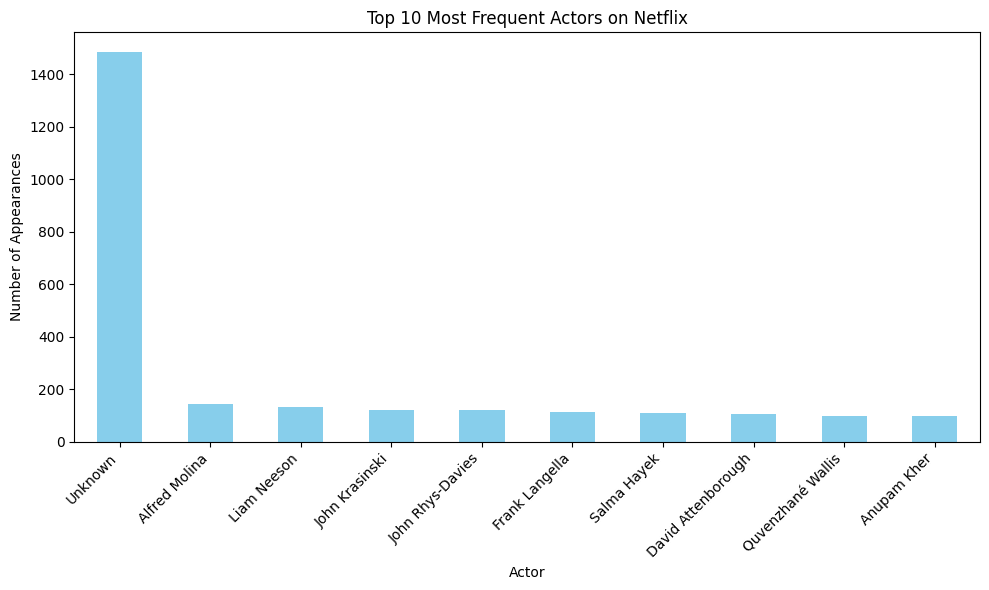

In [99]:
# Count the most frequent actors
top_actors = exploded_df['cast'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10,6))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

business insight.

The chart reveals a very high number of entries labeled as "Unknown," indicating that a significant portion of the dataset lacks actor information. Among the named actors, Alfred Molina, Liam Neeson, John Krasinski, and others have the highest number of appearances, but their counts are much lower compared to the "Unknown" category.

The overwhelming presence of "Unknown" highlights a data quality issue—many titles are missing cast information, which may limit the effectiveness of actor-based recommendation systems or content analytics. For Netflix, improving metadata completeness could enhance personalization and search features. Additionally, the relatively even distribution among the top named actors suggests that Netflix's catalog features a diverse range of talent, rather than being dominated by a few stars.



